Assignment 12: In this assignment you will use the above dataset to perform a customer segmentation , find and group customers based on:

* Sex
* Marital Status
* Age
* Education
* Income
* Occupation
* Settlement size,

to market to the customers effectively.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path =('/content/drive/MyDrive/segmentation_data.csv')
df = pd.read_csv(file_path)
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
df.shape

(2000, 8)

In [5]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [6]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [38]:
print("Unique values in 'Sex':", df['Sex'].unique()) #Sex 0 is Male, 1 is Female
print("Unique values in 'Marital status':", df['Marital status'].unique()) #Marital status 0 is single, 1 is married
print("Unique values in 'Age':", df['Age'].unique())
print("Unique values in 'Education':", df['Education'].unique()) #Education clasification : 0 = high school, 1 = diploma , 2 = degree , 3 = master
print("Unique values in 'Income':", df['Income'].unique())
print("Unique values in 'Occupation':", df['Occupation'].unique()) #Occupation classification , could be base on industry or level , 0 = x , 1 = y ,2 = z
print("Unique values in 'Settlement size':", df['Settlement size'].unique())



Unique values in 'Sex': [0 1]
Unique values in 'Marital status': [0 1]
Unique values in 'Age': [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]
Unique values in 'Education': [2 1 0 3]
Unique values in 'Income': [124670 150773  89210 ...  86400  97968  68416]
Unique values in 'Occupation': [1 0 2]
Unique values in 'Settlement size': [2 0 1]


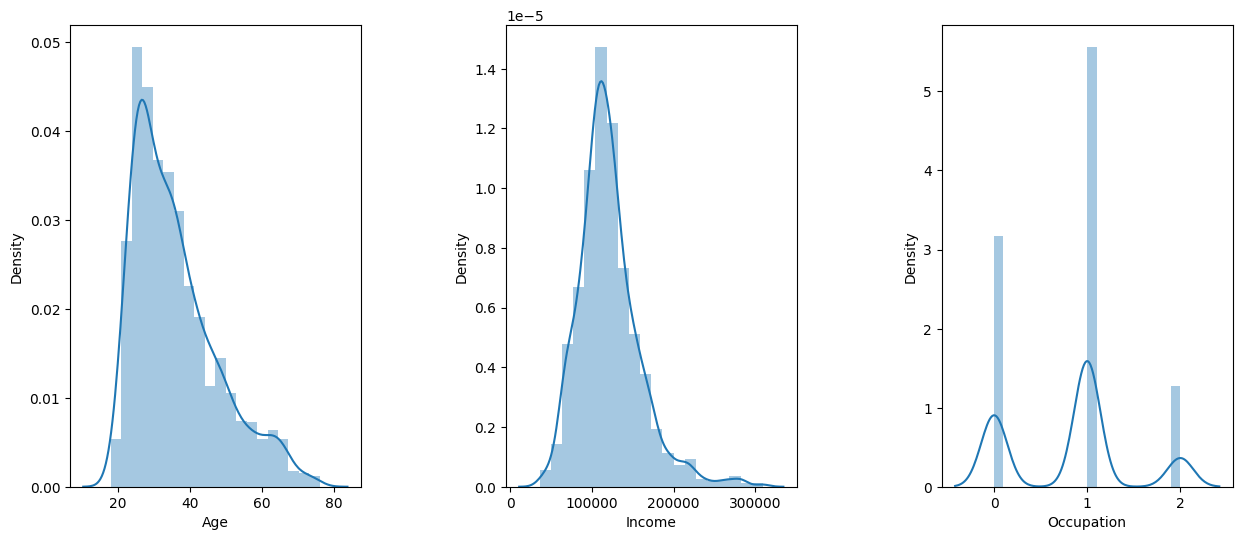

In [8]:
#Data Visualization
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Income', "Occupation"]

pos = 1
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

plt.show()

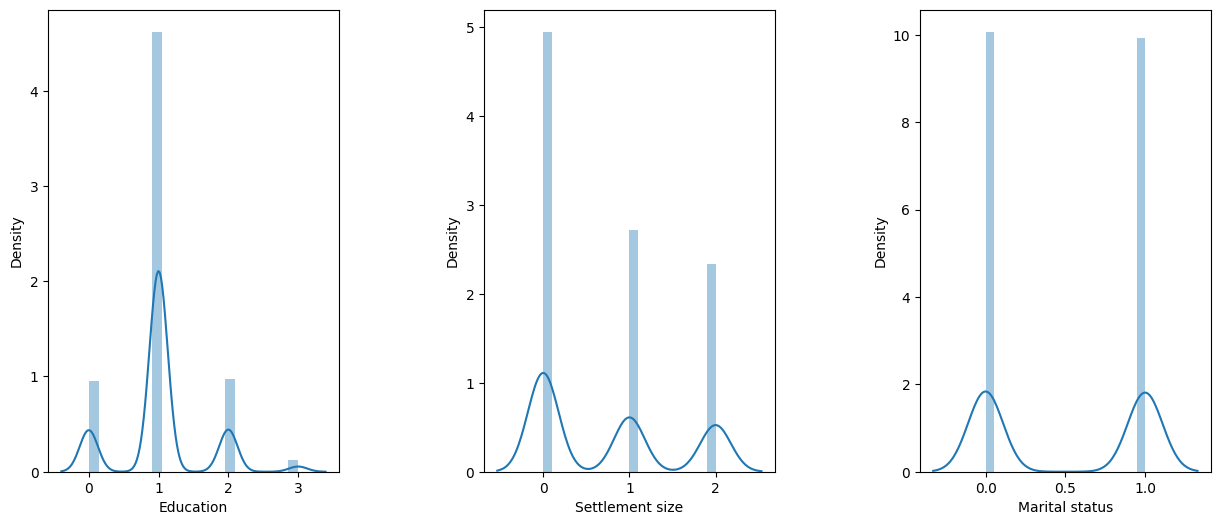

In [9]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Education','Settlement size', "Marital status"]

pos = 1
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

plt.show()

0    1086
1     914
Name: Sex, dtype: int64

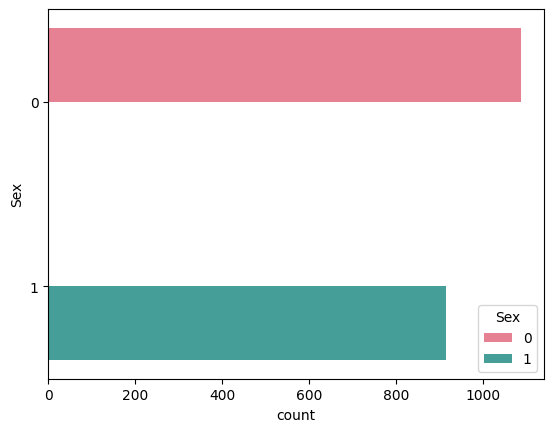

In [10]:
#Count and plot gender
sns.countplot(y = 'Sex', data = df, palette="husl", hue = "Sex") #0 is male, 1 is female
df["Sex"].value_counts()

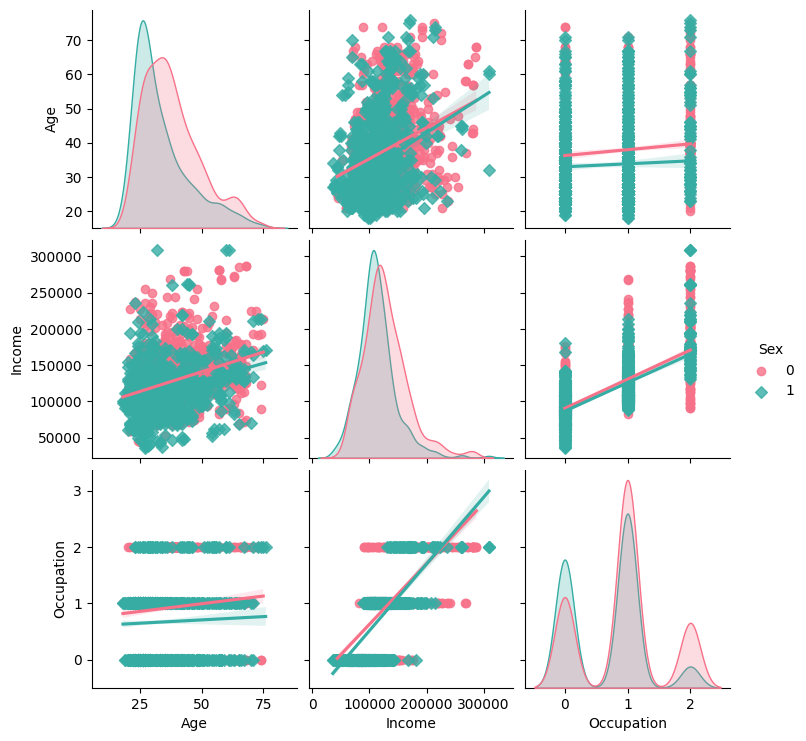

In [11]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=['Age','Income', "Occupation"],  kind ="reg", hue = "Sex", palette="husl", markers = ['o','D'])

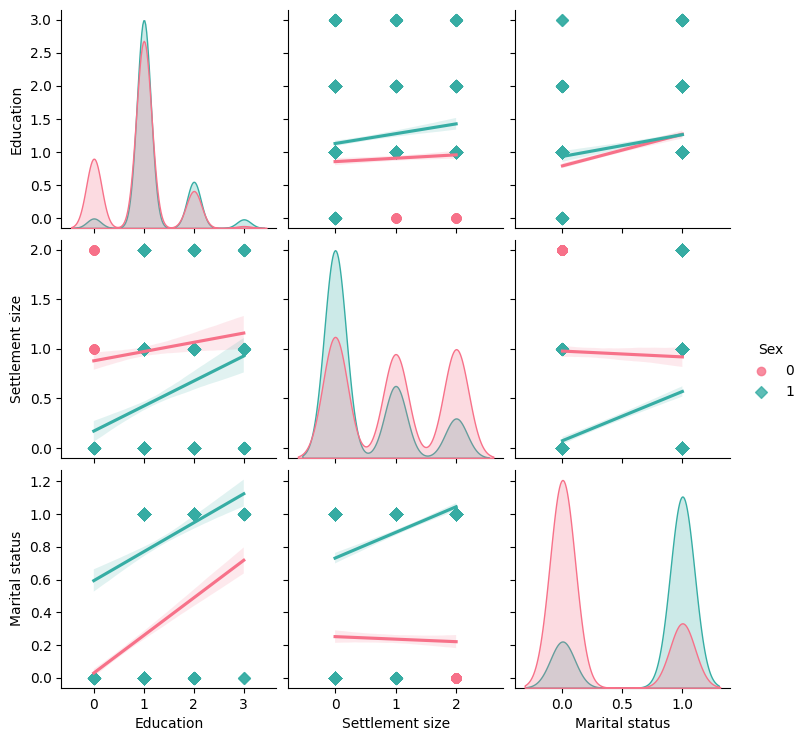

In [12]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=['Education','Settlement size', "Marital status"],  kind ="reg", hue = "Sex", palette="husl", markers = ['o','D'])

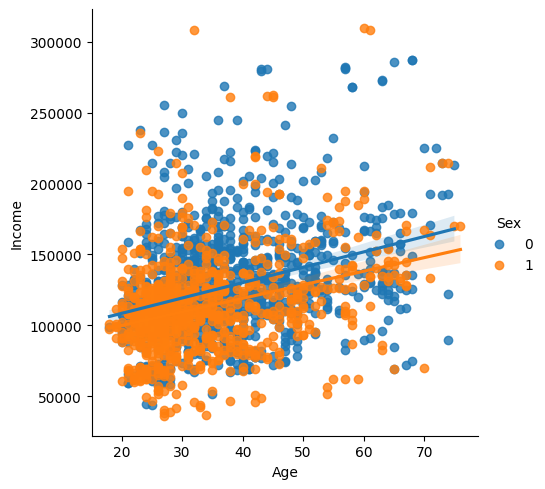

In [13]:
sns.lmplot(x = "Age", y = "Income", data = df, hue = "Sex")

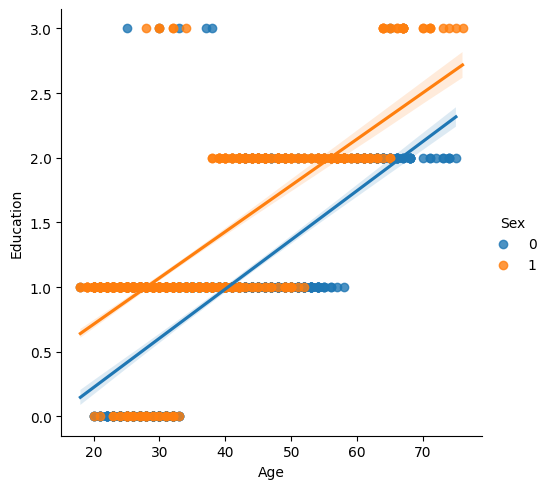

In [14]:
sns.lmplot(x = "Age", y = "Education", data = df, hue = "Sex")

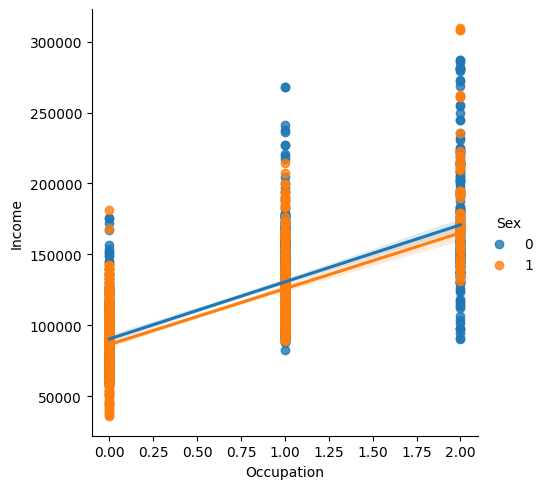

In [15]:
sns.lmplot(x = "Occupation", y = "Income", data = df, hue = "Sex")

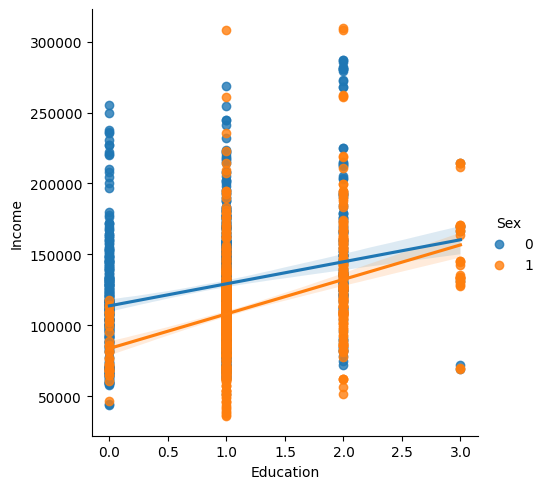

In [16]:
sns.lmplot(x = "Education", y = "Income", data = df, hue = "Sex")

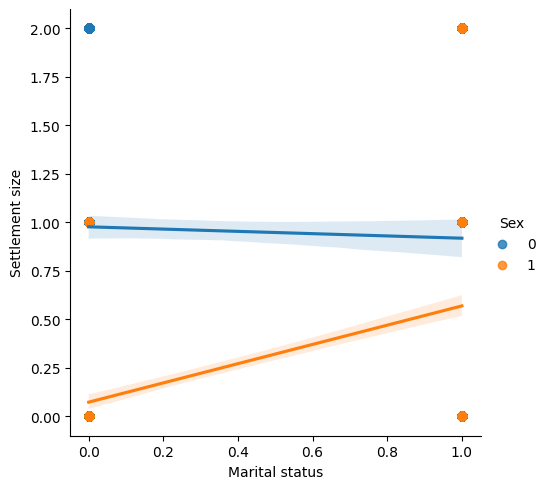

In [17]:
sns.lmplot(x = "Marital status", y = "Settlement size", data = df, hue = "Sex")

In [18]:
#Creating values for the elbow
X = df.loc[:,["Age", "Income", "Occupation"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

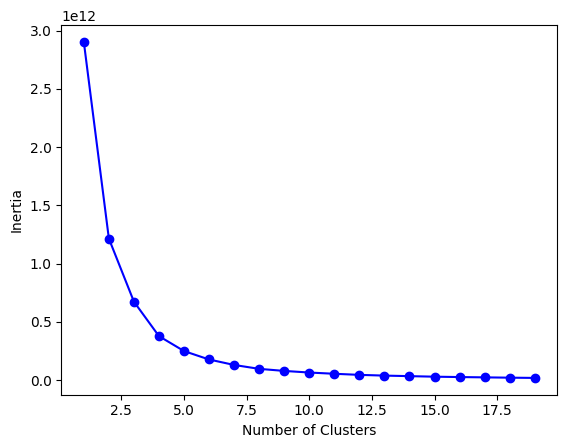

In [19]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
# Test : Predicting the Effect of Education and Occupation on Income
#I wanted to know does a person income related on his/ her Education and Occupation

task1_df = df[['Education', 'Occupation', 'Income']]

task1_df_encoded = pd.get_dummies(task1_df, columns=['Education', 'Occupation'], drop_first=True)

X_task1 = task1_df_encoded.drop('Income', axis=1)
y_task1 = task1_df_encoded['Income']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(X_task1, y_task1, test_size=0.2, random_state=0)

model_task1 = LinearRegression()
model_task1.fit(X_train_task1, y_train_task1)

# Make predictions
y_pred_task1 = model_task1.predict(X_test_task1)

# Evaluate the model
mse_task1 = mean_squared_error(y_test_task1, y_pred_task1)
print(f'Mean Squared Error: {mse_task1}')

#the model may not accurately capture the complexities of the income prediction task,
#and further exploration or model refinement may be needed for more accurate predictions.
#Ingore this

Mean Squared Error: 662976297.5571122


In [25]:

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

selected_columns = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']
segmentation_data = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Number of clusters (k), I choose 6
k = 6

# Training kmeans with 6 clusters
means_k = KMeans(n_clusters=k, random_state=0)
labels = means_k.fit_predict(segmentation_data_scaled)
centroids = means_k.cluster_centers_

unique_labels = set(labels)

# Create a legend mapping cluster number to color
legend_data = [{'label': f'Cluster {label}', 'color': color} for label, color in zip(unique_labels, px.colors.qualitative.Set1)]

# Create a list of traces for each cluster
traces = []
for label in unique_labels:
    cluster_data = segmentation_data[labels == label]
    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Income'],
        z=cluster_data['Sex'],
        mode='markers',
        marker=dict(
            color=label,
            size=15,
            opacity=0.9
        ),
        name=f'Cluster {label}'
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='3D Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Income'),
        zaxis=dict(title='Gender')
    ),
    legend=dict(itemsizing='constant', itemwidth=100),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Add the legend to the layout
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='All',
                     method='relayout',
                     args=['visible', [True] * len(traces)]),
            ],
        ),
    ],
)

# Display the plot
py.iplot(fig)


In [27]:
df['Cluster'] = labels

# Group by 'Cluster' and 'Gender' and calculate counts
cluster_sex_counts = df.groupby(['Cluster', 'Sex']).size().unstack().fillna(0)

# Calculate percentage for each cluster
cluster_sex_percentage = cluster_sex_counts.div(cluster_sex_counts.sum(axis=1), axis=0) * 100

# Display the result
print("Percentage of Male and Female in Each Cluster:")
print(cluster_sex_percentage)

Percentage of Male and Female in Each Cluster:
Sex              0          1
Cluster                      
0        62.427746  37.572254
1        25.333333  74.666667
2        99.585921   0.414079
3        18.859649  81.140351
4        24.358974  75.641026
5        65.057471  34.942529




1. Cluster 0 , Dark Blue , High Income, High Age , Male 62% , Female 38%
2. Cluster 1 , Red , Medium income , Medium Age , Male 25% , Female 75%
3. Cluster 2 , Green,High income , Medium age ,Male 99.6% , Female 0.4%
4. Cluster 3 , Purple , Medium income , High age , Male 19% , Female 81%
5. Cluster 4 , Orange, High income , High age , Male 24% , Female 78%
6. Cluster 5 , Light Blue, Low income, Low age , mmale 65% , Female 35%


In [37]:
import plotly.graph_objs as go
import plotly.offline as pyo

cluster_counts = df['Cluster'].value_counts()

# Calculate percentage for each cluster
cluster_percentage = (cluster_counts / len(df)) * 100

# Create a Pie chart
pie_chart = go.Figure(data=[go.Pie(labels=cluster_percentage.index, values=cluster_percentage)])

# Update layout for better visualization
pie_chart.update_layout(title_text="Percentage of Data Points in Each Cluster")

# Display the pie chart
pyo.iplot(pie_chart)


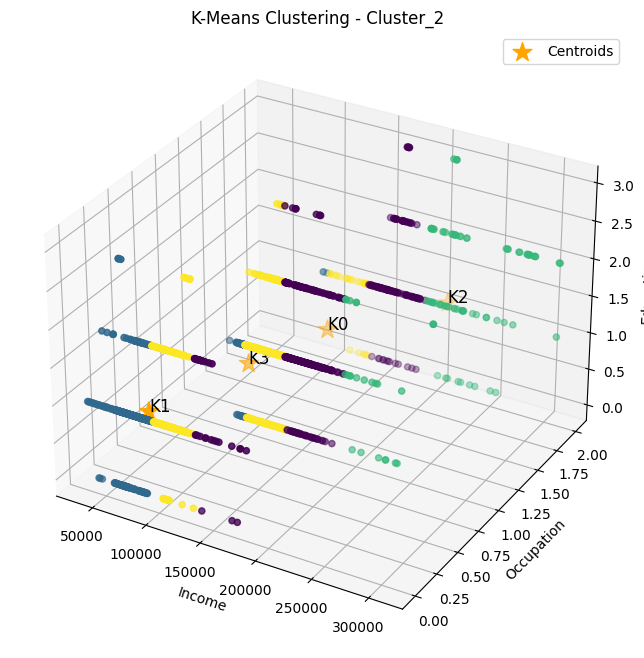

In [53]:
#I am also interested with income , education , occupation analysis . Created a second cluster to see if i can find anything insteresting

features = ['Income', 'Occupation', 'Education']
X_cluster_2 = df[features]

kmeans_cluster_2 = KMeans(n_clusters=4, random_state=0)
labels_cluster_2 = kmeans_cluster_2.fit_predict(X_cluster_2)

df['Cluster_2'] = labels_cluster_2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_cluster_2['Income'], X_cluster_2['Occupation'], X_cluster_2['Education'], c=labels_cluster_2, cmap='viridis')

centroids = kmeans_cluster_2.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', s=200, c='orange', label='Centroids')

for i, label in enumerate(centroids):
    ax.text(centroids[i, 0], centroids[i, 1], centroids[i, 2], f'K{i}', fontsize=12, color='black')

ax.set_title('K-Means Clustering - Cluster_2')
ax.set_xlabel('Income')
ax.set_ylabel('Occupation')
ax.set_zlabel('Education')
ax.legend()

plt.show()


#Not really helpful


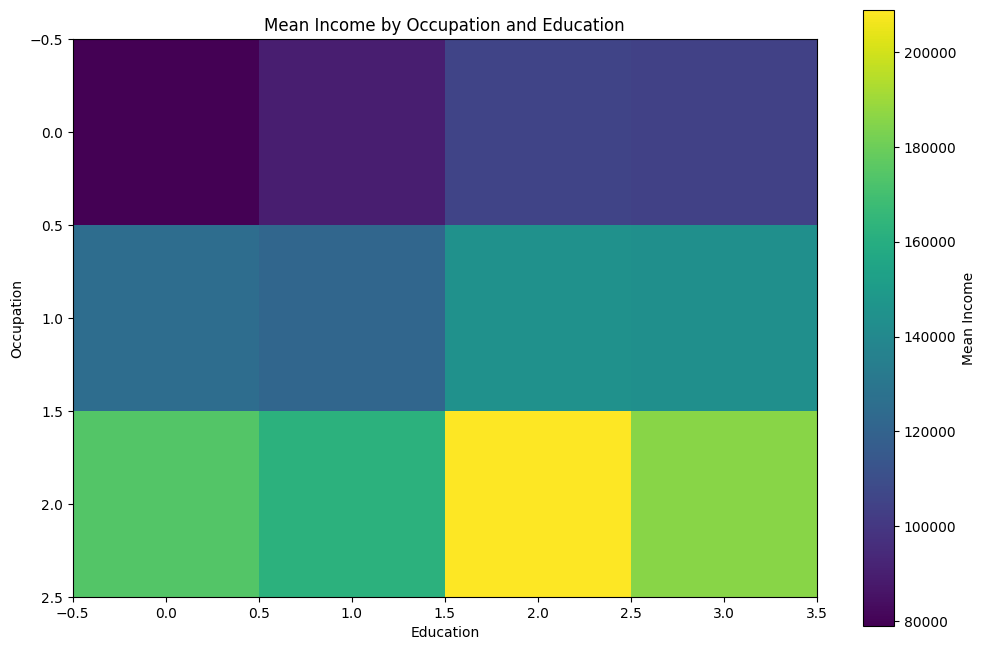

In [54]:
#Try using Data Aggregation:

grouped_data = df.groupby(['Occupation', 'Education']).mean()['Income'].reset_index()

# Plotting
plt.figure(figsize=(12, 8))
heatmap_data = grouped_data.pivot('Occupation', 'Education', 'Income')
plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Mean Income')
plt.xlabel('Education')
plt.ylabel('Occupation')
plt.title('Mean Income by Occupation and Education')
plt.show()


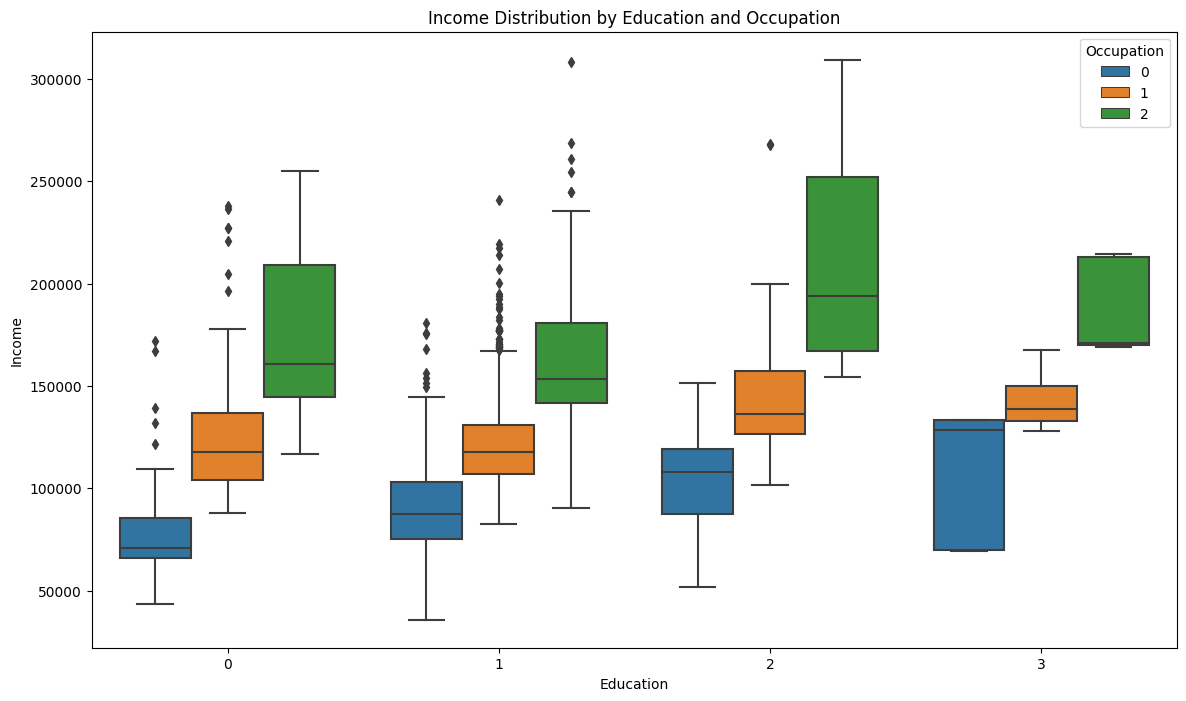

In [55]:
#box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='Education', y='Income', hue='Occupation', data=df)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income Distribution by Education and Occupation')
plt.show()


From this fig , People with high income mostly from Occupation = 2 , Education majority = 1

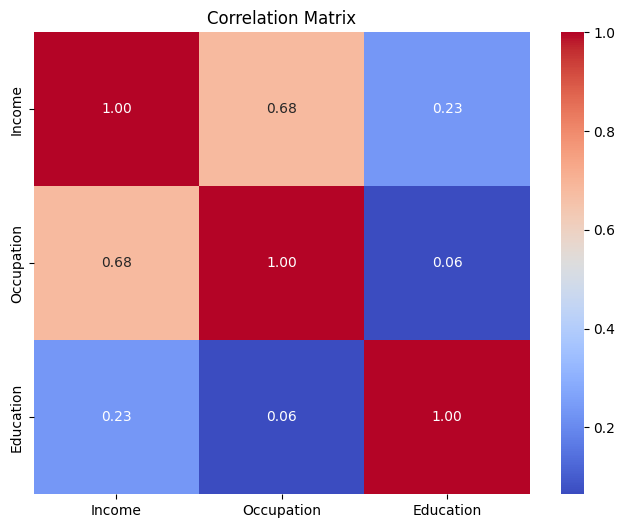

In [56]:
# correlation analysis
correlation_matrix = df[['Income', 'Occupation', 'Education']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [58]:
#Also, depend on the market research needed , we can flexibly select the meaning feature and clustering them

selected_columns_3 = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']
segmentation_data_3 = df[selected_columns_3]

scaler_3 = StandardScaler()
segmentation_data_scaled_3 = scaler_3.fit_transform(segmentation_data_3)

k_3 = 4

# Training kmeans with 3 clusters
means_k_3 = KMeans(n_clusters=k_3, random_state=0)
labels_3 = means_k_3.fit_predict(segmentation_data_scaled_3)
centroids_3 = means_k_3.cluster_centers_

unique_labels_3 = set(labels_3)

# Create a legend mapping cluster number to color
legend_data_3 = [{'label': f'Cluster {label}', 'color': color} for label, color in zip(unique_labels_3, px.colors.qualitative.Set1)]

# Create a 3d plot to view the data separation made by Kmeans
trace1_3 = go.Scatter3d(
    x=segmentation_data_3['Settlement size'],
    y=segmentation_data_3['Education'],
    z=segmentation_data_3['Marital status'],
    mode='markers',
    marker=dict(
        color=labels_3,
        size=15,
        line=dict(
            color=labels_3,
        ),
        opacity=0.9
    )
)

layout_3 = go.Layout(
    title='3D Clusters',
    scene=dict(
        xaxis=dict(title='Settlement size'),
        yaxis=dict(title='Education'),
        zaxis=dict(title='Marital status')
    )
)

fig_3 = go.Figure(data=trace1_3, layout=layout_3)
py.iplot(fig_3)


* Cluster 0 , Blue , Married Low Education , Average Settlement Size.
* Cluster 1, Orange , Single , Low Education , High Settlement Size
* Cluster 2, Yellow, Both Married & Single, High Education , Average Settlement Size.
* Cluster 3, Purple , Single, Average Education, Low Settlement Size